**Mounting google drive to acess files stored on drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries for EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing libraries for ML Regression model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

**Creating dataframe**

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df['Med_House_value'] = data.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MedInc           20640 non-null  float64
 1   HouseAge         20640 non-null  float64
 2   AveRooms         20640 non-null  float64
 3   AveBedrms        20640 non-null  float64
 4   Population       20640 non-null  float64
 5   AveOccup         20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   Med_House_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='HouseAge'>

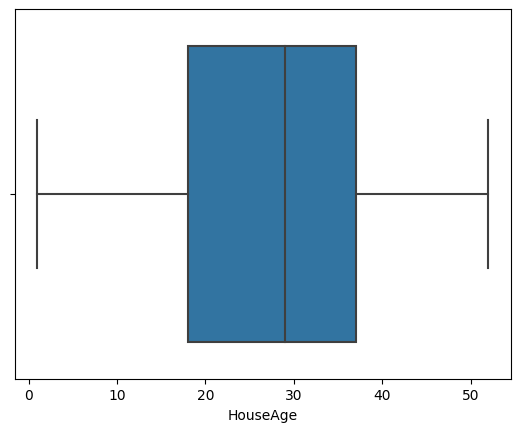

In [ ]:
sns.boxplot(x = df['HouseAge'])

**Picking the data where most of the value lies**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

MedInc               2.179850
HouseAge            19.000000
AveRooms             1.611665
AveBedrms            0.093447
Population         938.000000
AveOccup             0.852520
Latitude             3.780000
Longitude            3.790000
Med_House_value      1.451250
dtype: float64


In [ ]:
df.shape

(20640, 9)

In [ ]:
data_copy = df.copy()
data_IQR = data_copy[~((data_copy < (Q1 - 1.5*IQR)) | (data_copy > (Q3 + 1.5*IQR))).any(axis=1)]
data_IQR.shape

(16312, 9)

In [ ]:
data = data_IQR.copy()
data.isnull().sum()

MedInc             0
HouseAge           0
AveRooms           0
AveBedrms          0
Population         0
AveOccup           0
Latitude           0
Longitude          0
Med_House_value    0
dtype: int64

In [ ]:
x = data.drop(['Med_House_value'], axis = 1)
y = data['Med_House_value']

In [ ]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25


In [ ]:
y.head()

2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
Name: Med_House_value, dtype: float64

In [ ]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_train.shape

(11418, 8)

In [ ]:
x_test.shape

(4894, 8)

**Decision Tree**

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)
y_pred

array([1.792, 1.436, 1.054, ..., 0.934, 1.696, 1.364])

In [ ]:
y_test

7837     1.440
16608    1.582
11935    1.120
20553    0.953
3931     1.788
         ...  
3865     2.613
19892    0.619
20614    0.580
14534    1.712
18951    0.990
Name: Med_House_value, Length: 4894, dtype: float64

In [ ]:
mean_squared_error(y_pred, y_test)

0.435113930016367

**Random Forest**

In [ ]:
rfr = RandomForestRegressor(1000)
rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)
mean_squared_error(y_pred, y_test)

0.20524365738241648